In [1]:
# %matplotlib notebook

This notebook contains drafting of a nice-looking pie/donut chart.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
current_palette = sns.color_palette("colorblind", 10)
sns.set_palette(current_palette)

In [4]:
sns.palplot(current_palette)

### Load data

In [5]:
path_to_data = "../data/raw/cacm_results.csv"
df = pd.read_csv(path_to_data)
df.rename({"name": "id"}, axis="columns", inplace=True)
df.set_index("id", inplace=True, drop=True)
df.head()

result  runtime
id                       
41-100899    SAT    0.134
41-101096    SAT    0.144
41-101114    SAT    0.087
41-101373    SAT    0.195
41-102360    SAT    0.094

### Creating a custom style sheet

One can also set the font to use for titles, tick marks and so on. For example, the cell below allows for TeX typesetting and uses the standard TeX font. Have a look at the [documentation](https://matplotlib.org/users/customizing.html#customizing-matplotlib)

In [103]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rc('text', usetex=True)
mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rcParams.update({'font.size': 13})

### Pies and donuts

Pies and donut charts are unpopular but I like them.

First we create a figure and an axes object. The figure is the whole canvas and can consist of several axes objects.

There are many different styles available for the figures and axes. A style is a starting point in terms of how the figure should look like. It sets a background color and decides what ticks should look like for example.

In [7]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

Now let's create a pie chart, using the pie() method in matplotlib.

In [8]:
results_dict = df["result"].value_counts().to_dict()
results_dict

{'SAT': 9482, 'TIMEOUT': 397, 'UNSAT': 121}

In [9]:
results_list = list(results_dict.values())

In [10]:
tri_color = [current_palette[i] for i in [3,7,9]]

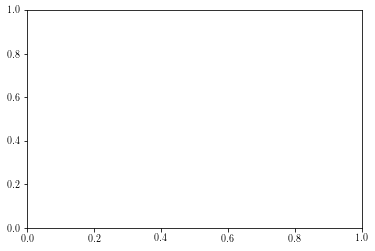

In [12]:
fig, ax = plt.subplots()

In [13]:
ax.pie(results_list, colors=tri_color)

([<matplotlib.patches.Wedge at 0x108354940>,
 [Text(-1.08547,0.178219,''),
  Text(1.07791,-0.219342,''),
  Text(1.09921,-0.0418046,'')])

A patch is an object, such as a circle or an arrow, and a subclass of the Artist class in matplotlib. An artist is the *abstract base class* of any object that can be rendered into a *FigureCanvas*.

In [14]:
centre_circle = plt.Circle((0,0),0.24,color='white', fc='white',linewidth=1.25)
ax.add_patch(centre_circle)

In [15]:
left = 0
right = 1
bottom = 0
top = 1

In [16]:
ax.text(0.5*(left+right), 0.5*(bottom+top), 'All',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='black',
        transform=ax.transAxes)

Text(0.5,0.5,'All')

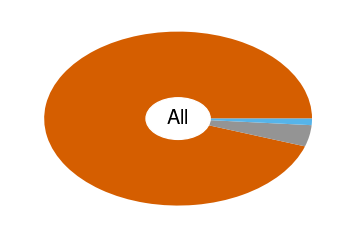

In [17]:
fig

### Deprecated

In [79]:
resultCounts = df["result"].value_counts()
resultCounts.sort_index(inplace=True)
print(resultCounts)
resultCounts_asarray = np.asarray(resultCounts)


resultCounts1 = df["result"].loc[df["runtime"] > 0.1].value_counts()
resultCounts1.sort_index(inplace=True)

resultCounts2 = df["result"].loc[df["runtime"] > 1].value_counts()
resultCounts2.sort_index(inplace=True)

resultCounts3 = df["result"].loc[df["runtime"] > 10].value_counts()
resultCounts3.sort_index(inplace=True)

print(resultCounts2)
resultCounts1_asarray = np.asarray(resultCounts1)
resultCounts2_asarray = np.asarray(resultCounts2)
resultCounts3_asarray = np.asarray(resultCounts3)

SAT        9482
TIMEOUT     397
UNSAT       121
Name: result, dtype: int64
SAT        710
TIMEOUT    397
UNSAT      120
Name: result, dtype: int64


In [81]:
resultCounts3

SAT        108
TIMEOUT    397
UNSAT       69
Name: result, dtype: int64

In [95]:
resultCounts_asarray

array([9482,  397,  121])

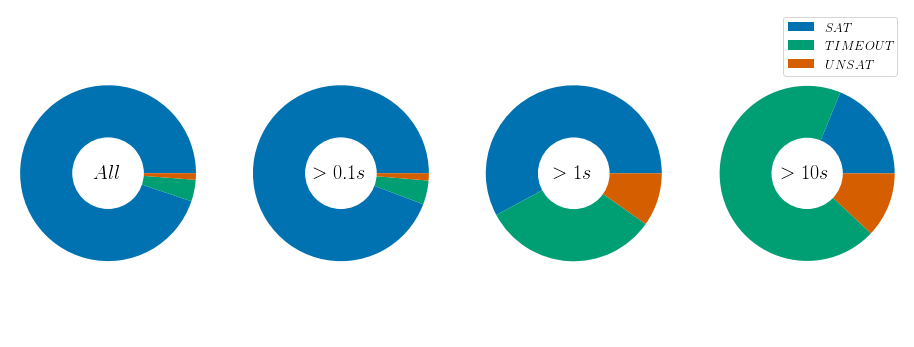

In [108]:
f = plt.figure(figsize=(16,6))
ax = f.add_subplot(1, 4, 1)
ax1 = f.add_subplot(1, 4, 2)
ax2 = f.add_subplot(1, 4, 3)
ax3 = f.add_subplot(1, 4, 4)

ax.pie(resultCounts)
ax2.pie(resultCounts2)
ax3.pie(resultCounts3)
ax1.pie(resultCounts1)

ax.axis("equal")
ax2.axis("equal")
ax1.axis("equal")
ax3.axis("equal")

centre_circle = plt.Circle((0,0),0.4,color='white', fc='white',linewidth=1.25)
centre_circle2 = plt.Circle((0,0),0.4,color='white', fc='white',linewidth=1.25)
centre_circle1 = plt.Circle((0,0),0.4,color='white', fc='white',linewidth=1.25)
centre_circle3 = plt.Circle((0,0),0.4,color='white', fc='white',linewidth=1.25)
#f = plt.gcf()
#f.gca().add_artist(centre_circle)

ax.add_patch(centre_circle)
ax1.add_patch(centre_circle1)
ax2.add_patch(centre_circle2)
ax3.add_patch(centre_circle3)

# build a rectangle in axes coords
left, width = 0.33, 0.33
bottom, height = .4, .2
right = left + width
top = bottom + height

p = mpl.patches.Rectangle(
    (left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False
    )

#ax2.add_patch(p)

ax.text(0.5*(left+right), 0.5*(bottom+top), '$All$',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='black',
        transform=ax.transAxes)

ax1.text(0.5*(left+right)+1.2, 0.5*(bottom+top), '$>0.1s$',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='black',
        transform=ax.transAxes)

ax2.text(0.5*(left+right)+2.4, 0.5*(bottom+top), '$>1s$',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='black',
        transform=ax.transAxes)

ax3.text(0.5*(left+right)+3.6, 0.5*(bottom+top), '$>10s$',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='black',
        transform=ax.transAxes)

plt.legend(["$SAT$", "$TIMEOUT$", "$UNSAT$"])
plt.savefig("donuts.pdf")
plt.show()

In [91]:
plt.show()

In [88]:
plt.savefig("donuts.pdf")